### 读入数据集

In [49]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
cbg = pda.read_csv("G:\cbg_patterns.csv",header=0,sep='',delimiter=",", encoding='utf-8')

获取cbg数据集的列数以及shape

In [2]:
cols = cbg.columns
shape = cbg.shape
print(shape)
print(cols)

(220735, 13)
Index(['census_block_group', 'date_range_start', 'date_range_end',
       'raw_visit_count', 'raw_visitor_count', 'visitor_home_cbgs',
       'visitor_work_cbgs', 'distance_from_home', 'related_same_day_brand',
       'related_same_month_brand', 'top_brands', 'popularity_by_hour',
       'popularity_by_day'],
      dtype='object')


## 3.1 数据可视化和摘要

### 数据摘要

1、对称标属性，给出每个可能值的频数

首先使用pandas库中的方法将属性划分为对称标型和数值型

In [3]:
def object_number_divide(dataset):
    cbg_columns = cbg.columns[1::]
    cbg_object_list = []
    cbg_number_list = []
    for obj in cbg_columns:
        if str(cbg[obj].dtypes)== 'object':
            cbg_object_list.append(obj)
        else:
            cbg_number_list.append(obj)
    return cbg_object_list,cbg_number_list

通过上述函数可以得到对称标属性列表和数值型数值列表

In [4]:
cbg_object_list,cbg_number_list = object_number_divide(cbg)
print(cbg_object_list,cbg_number_list)

['visitor_home_cbgs', 'visitor_work_cbgs', 'related_same_day_brand', 'related_same_month_brand', 'top_brands', 'popularity_by_hour', 'popularity_by_day'] ['date_range_start', 'date_range_end', 'raw_visit_count', 'raw_visitor_count', 'distance_from_home']


下面对于每个标称型属性中的属性值求出对应每个可能取值的频数

In [11]:
pda.set_option('display.max_columns', None)#显示所有行
pda.set_option('display.max_rows', None)#显示所有列
groupname = 'visitor_home_cbgs'
print(cbg.groupby(by = groupname).size())

MemoryError: 

下面对于数值型属性，求出最大、最小、均值、中位数、四分位数及缺失值的个数。下面的每一行分别对应最小，最大，平均值，中位数，四分位数 和缺失值的个数。

In [13]:
for wol in cbg_number_list:
    print('*'*30)
    print(wol)
    print(cbg[wol].describe())
    print("The NULL value num:",cbg[wol].isnull().sum())

******************************
date_range_start
count    2.207350e+05
mean     1.538352e+09
std      0.000000e+00
min      1.538352e+09
25%      1.538352e+09
50%      1.538352e+09
75%      1.538352e+09
max      1.538352e+09
Name: date_range_start, dtype: float64
The NULL value num: 0
******************************
date_range_end
count    2.207350e+05
mean     1.541030e+09
std      0.000000e+00
min      1.541030e+09
25%      1.541030e+09
50%      1.541030e+09
75%      1.541030e+09
max      1.541030e+09
Name: date_range_end, dtype: float64
The NULL value num: 0
******************************
raw_visit_count
count    2.206290e+05
mean     4.793066e+04
std      6.252655e+04
min      6.000000e+01
25%      1.704200e+04
50%      3.064000e+04
75%      5.667800e+04
max      7.179900e+06
Name: raw_visit_count, dtype: float64
The NULL value num: 106
******************************
raw_visitor_count
count    2.206290e+05
mean     1.182032e+04
std      3.045832e+04
min      5.000000e+01
25%      3.4

### 数据可视化

1、绘制直方图，用qq图检验其分布是否为正态分布

(1)、对于date_range_start和date_range_end属性列所有的数值都是一样的,所以整体上属于正态分布；(2)、对于raw_visit_count、 raw_visitor_count、 distance_from_home属性列，从qq图中可以明显看出不属于正态分布。

date_range_start:


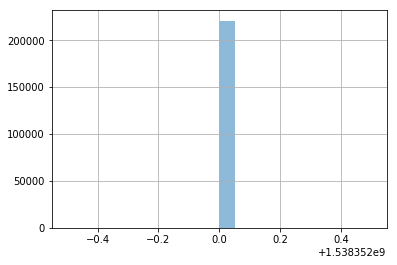

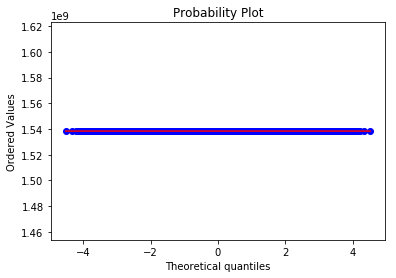

date_range_end:


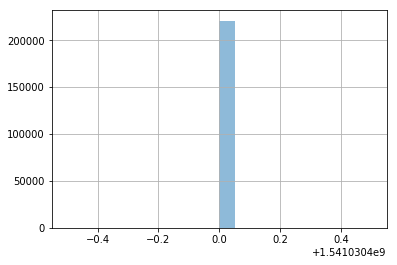

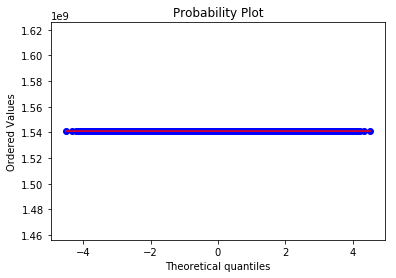

raw_visit_count:


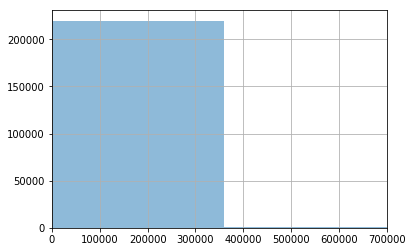

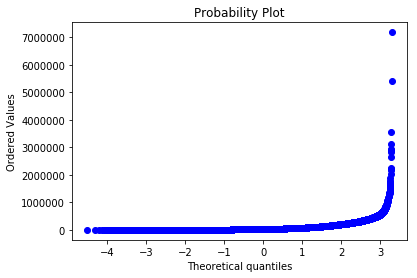

raw_visitor_count:


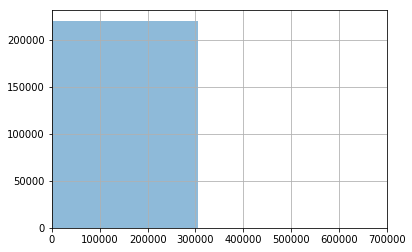

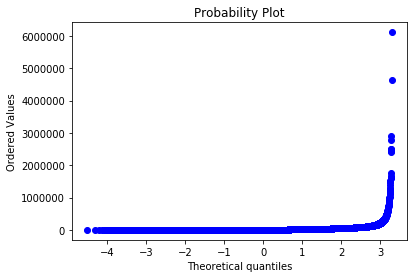

distance_from_home


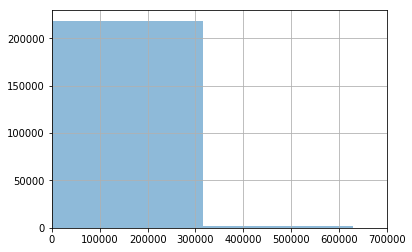

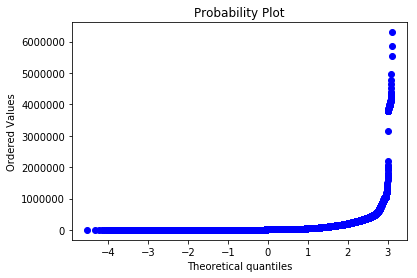

In [19]:
print("date_range_start:")
#直方图绘制
#plt.xlim(80,100)
cbg['date_range_start'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(cbg['date_range_start'],dist="norm",plot=plt)
plt.show()
print("date_range_end:")
#直方图绘制
#plt.xlim(80,100)
cbg['date_range_end'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(cbg['date_range_end'],dist="norm",plot=plt)
plt.show()
print("raw_visit_count:")
#直方图绘制
plt.xlim(0,700000)
cbg['raw_visit_count'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(cbg['raw_visit_count'],dist="norm",plot=plt)
plt.show()
print("raw_visitor_count:")
#直方图绘制
plt.xlim(0,700000)
cbg['raw_visitor_count'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(cbg['raw_visitor_count'],dist="norm",plot=plt)
plt.show()
print("distance_from_home")
#直方图绘制
plt.xlim(0,700000)
cbg['distance_from_home'].hist(alpha=0.5,bins=20)
plt.show()
#qq图绘制
stats.probplot(cbg['distance_from_home'],dist="norm",plot=plt)
plt.show()


2、绘制盒图，对离群值进行识别

通过对不同的属性列绘制盒图可知：（1）、date_range_start和date_range_end在盒图中只有一条线，因为整个列的数据是一样的，所以没有离群点；（2）、对于raw_visit_count、 raw_visitor_count、 distance_from_home属性列，从盒图上可以明显看出有非常多的离群点。

******************************
date_range_start


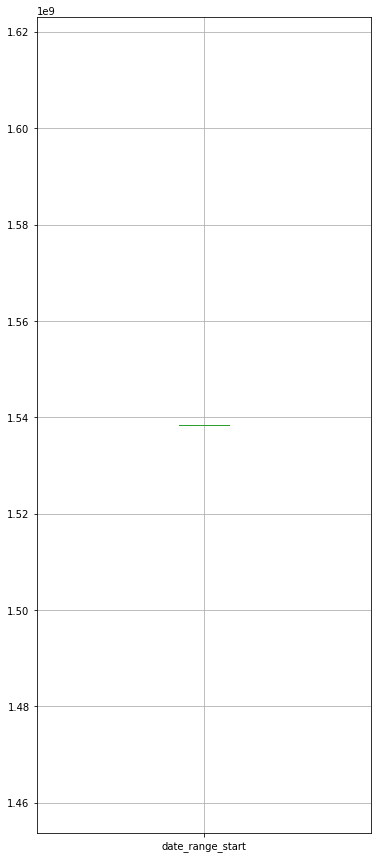

******************************
date_range_end


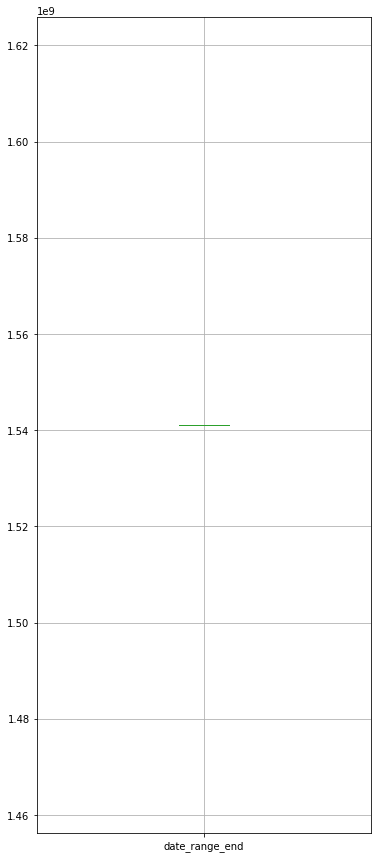

******************************
raw_visit_count


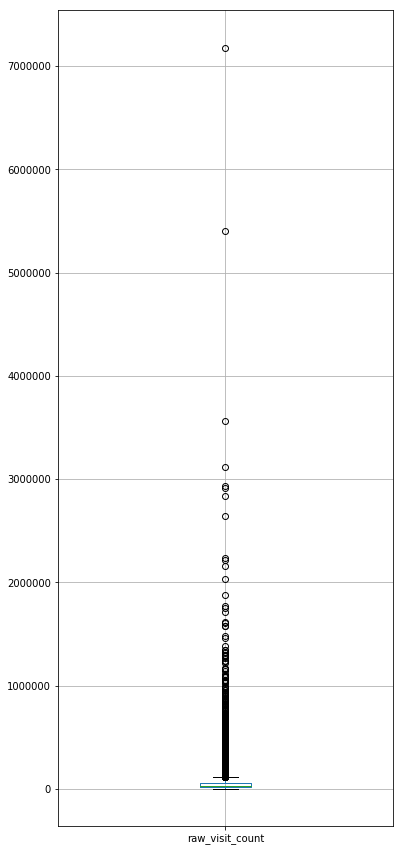

******************************
raw_visitor_count


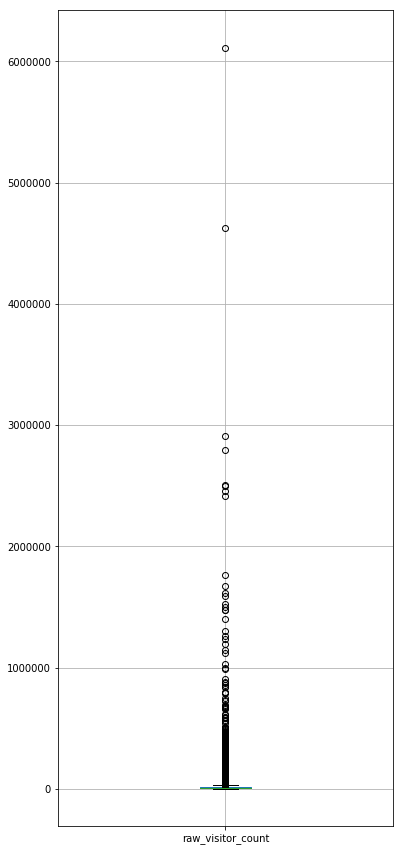

******************************
distance_from_home


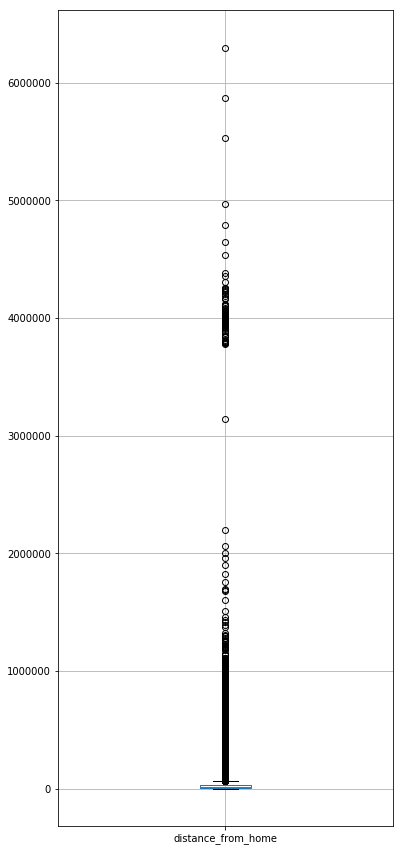

In [29]:
for wol in cbg_number_list:
    print('*'*30)
    print(wol)
    data=pda.DataFrame(cbg[wol])
    data.boxplot(figsize=(6,15))
    plt.show()


### 3.2 数据缺失的处理

1、观察数据集中缺失的数据，分析其缺失的原因

通过分析各个属性列缺失值的数量可以分析出:(1)、raw_visit_count和raw_visitor_count属性列表具有相关性，当raw_visit_count缺失时，raw_visitor_count列也同样丢失，raw_visit_count的缺失具有随机性；（2）、distance_from_home 是一个单独的数据项，所以缺失具有随机性。

In [30]:
for wol in cbg_object_list:
    print("The NULL value num of %s:",wol,cbg[wol].isnull().sum())
for wol in cbg_number_list:
    print("The NULL value num of %s:",wol,cbg[wol].isnull().sum())

The NULL value num of %s: visitor_home_cbgs 0
The NULL value num of %s: visitor_work_cbgs 0
The NULL value num of %s: related_same_day_brand 0
The NULL value num of %s: related_same_month_brand 0
The NULL value num of %s: top_brands 0
The NULL value num of %s: popularity_by_hour 0
The NULL value num of %s: popularity_by_day 0
The NULL value num of %s: date_range_start 0
The NULL value num of %s: date_range_end 0
The NULL value num of %s: raw_visit_count 106
The NULL value num of %s: raw_visitor_count 106
The NULL value num of %s: distance_from_home 217


2、分别使用下列四种策略对缺失值进行处理:

（1）、将缺失部分剔除

       raw_visit_count
count     2.206290e+05
mean      4.793066e+04
std       6.252655e+04
min       6.000000e+01
25%       1.704200e+04
50%       3.064000e+04
75%       5.667800e+04
max       7.179900e+06
The NULL value num: raw_visit_count    0
dtype: int64


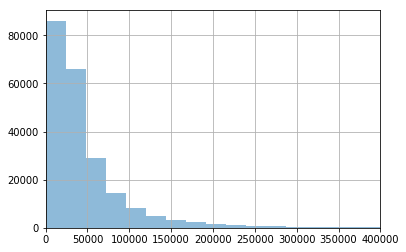

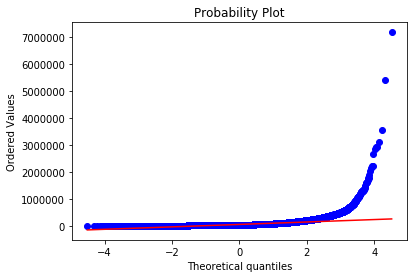

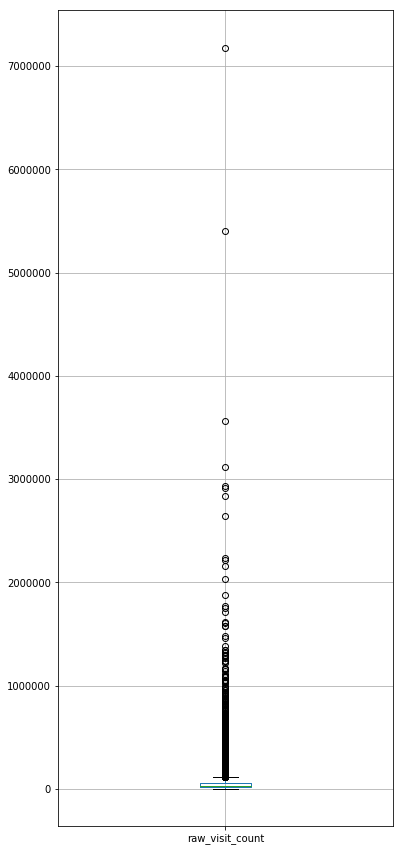

       raw_visitor_count
count       2.206290e+05
mean        1.182032e+04
std         3.045832e+04
min         5.000000e+01
25%         3.430000e+03
50%         6.541000e+03
75%         1.309900e+04
max         6.113949e+06
The NULL value num: raw_visitor_count    0
dtype: int64


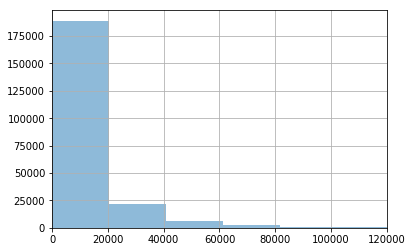

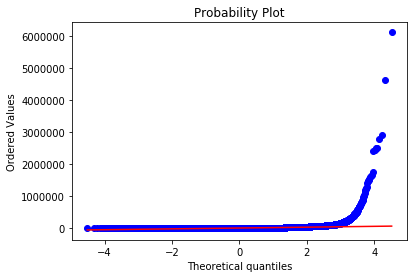

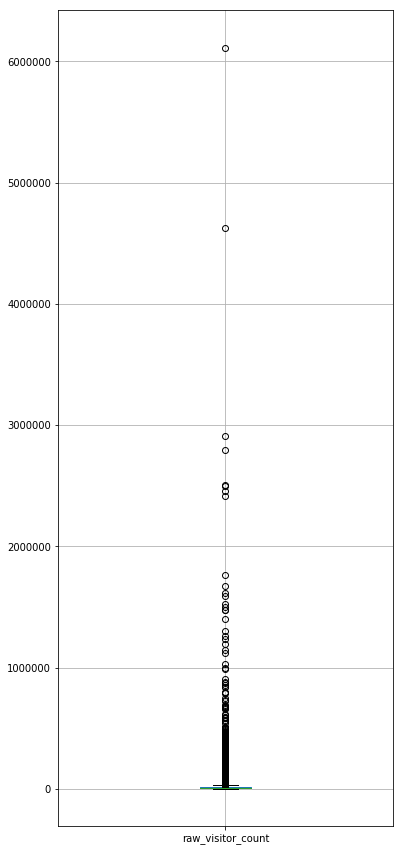

       distance_from_home
count        2.205180e+05
mean         3.511280e+04
std          9.973193e+04
min          7.060000e+02
25%          8.584000e+03
50%          1.461400e+04
75%          3.139775e+04
max          6.297845e+06
The NULL value num: distance_from_home    0
dtype: int64


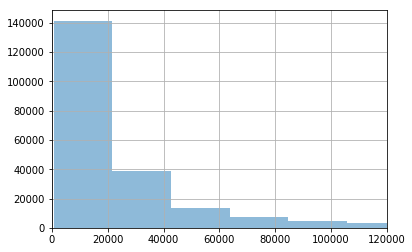

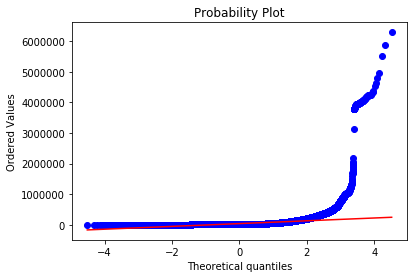

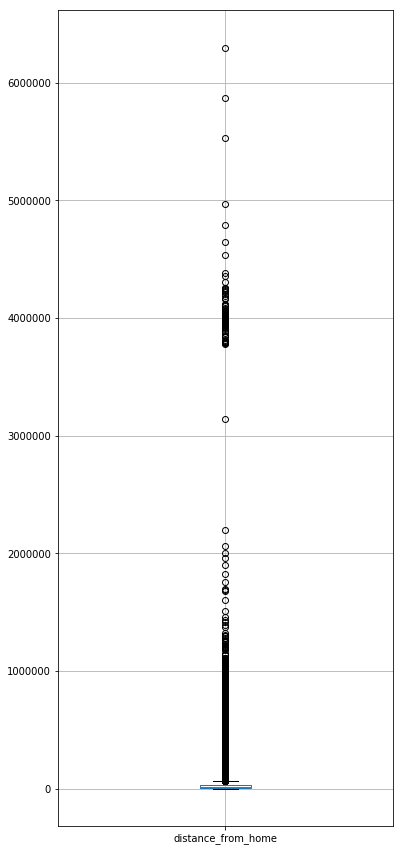

In [35]:
# raw_visit_count 去除缺失的数据
data1=pda.DataFrame(cbg['raw_visit_count'])
data1 = data1.dropna()
print(data1.describe())
print("The NULL value num:", data1.isnull().sum())
#绘制直方图
plt.xlim(0,400000)
data1['raw_visit_count'].hist(alpha=0.5,bins=300).get_figure()
plt.show()
#qq图绘制
stats.probplot(data1['raw_visit_count'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data1.boxplot(figsize=(6,15))
plt.show()

# raw_visit_count 去除缺失的数据
data2=pda.DataFrame(cbg['raw_visitor_count'])
data2 = data2.dropna()
print(data2.describe())
print("The NULL value num:", data2.isnull().sum())
#绘制直方图
plt.xlim(0,120000)
data2['raw_visitor_count'].hist(alpha=0.5,bins=300).get_figure()
plt.show()
#qq图绘制
stats.probplot(data2['raw_visitor_count'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data2.boxplot(figsize=(6,15))
plt.show()

# raw_visit_count 去除缺失的数据
data3=pda.DataFrame(cbg['distance_from_home'])
data3 = data3.dropna()
print(data3.describe())
print("The NULL value num:", data3.isnull().sum())
#绘制直方图
plt.xlim(0,120000)
data3['distance_from_home'].hist(alpha=0.5,bins=300).get_figure()
plt.show()
#qq图绘制
stats.probplot(data3['distance_from_home'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data3.boxplot(figsize=(6,15))
plt.show()

（2）、用最高频率值来填补缺失值

众数:
 0    24531.0
dtype: float64
       raw_visit_count
count     2.206290e+05
mean      4.793066e+04
std       6.252655e+04
min       6.000000e+01
25%       1.704200e+04
50%       3.064000e+04
75%       5.667800e+04
max       7.179900e+06
The NULL value num: raw_visit_count    106
dtype: int64


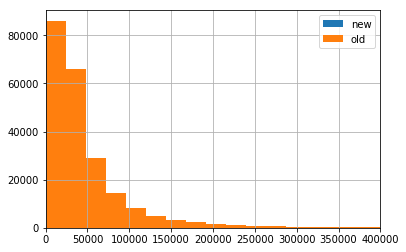

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


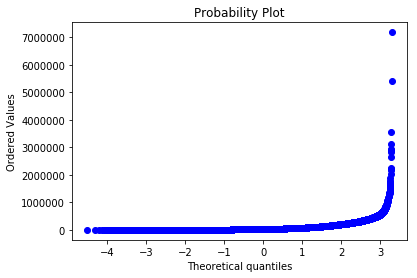

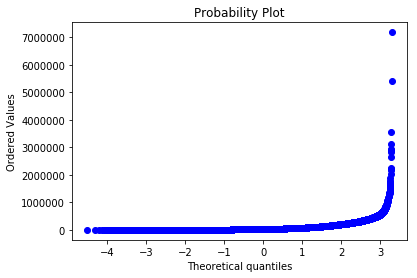

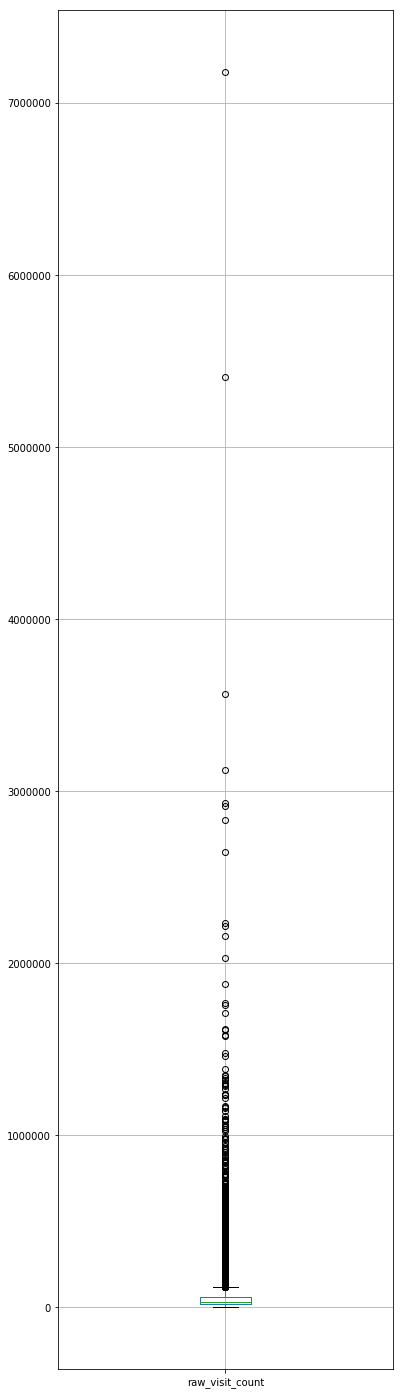

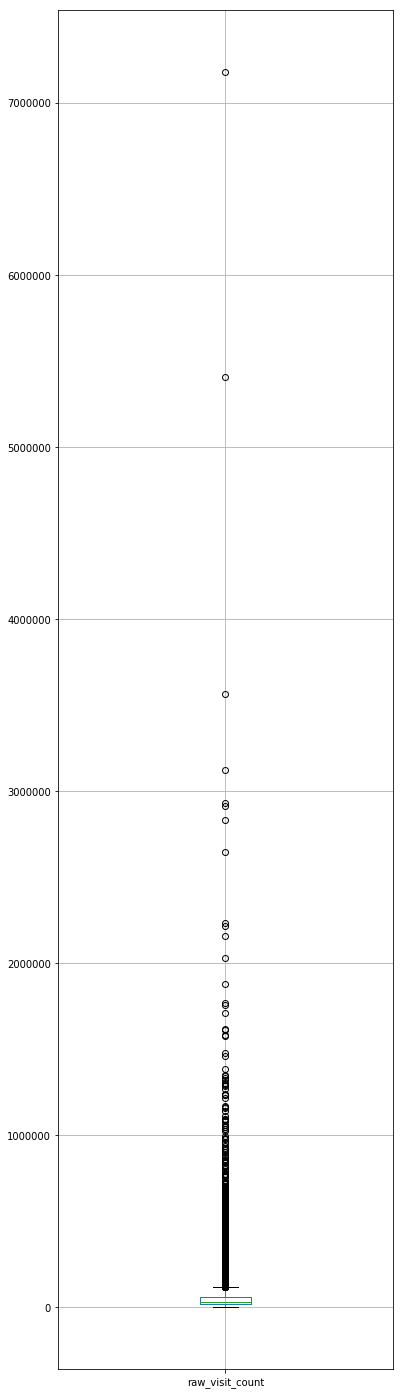

In [44]:
data1=pda.DataFrame(cbg,columns=['raw_visit_count'])
mode1 = data1['raw_visit_count'].mode()
print("众数:\n",mode1)
data11 = pda.DataFrame(cbg,columns=['raw_visit_count'])
data11['raw_visit_count'].fillna(mode1, inplace=True)

print(data11.describe())
print("The NULL value num:", data11.isnull().sum())
#绘制直方图
plt.xlim(0,400000)
data11['raw_visit_count'].hist(bins=300)
data1['raw_visit_count'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
#qq图绘制
stats.probplot(data11['raw_visit_count'], dist="norm", plot=plt)
plt.show()
stats.probplot(data1['raw_visit_count'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data11.boxplot(figsize=(6,25))
plt.show()
data1.boxplot(figsize=(6,25))
plt.show()

众数:
 0    2292.0
dtype: float64
       raw_visitor_count
count       2.206290e+05
mean        1.182032e+04
std         3.045832e+04
min         5.000000e+01
25%         3.430000e+03
50%         6.541000e+03
75%         1.309900e+04
max         6.113949e+06
The NULL value num: raw_visitor_count    106
dtype: int64


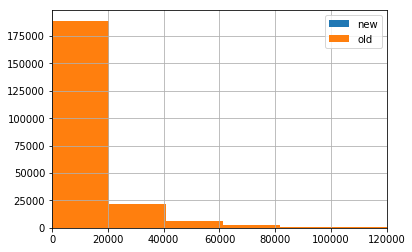

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


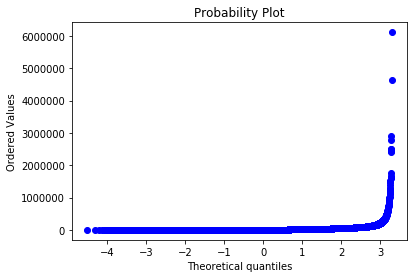

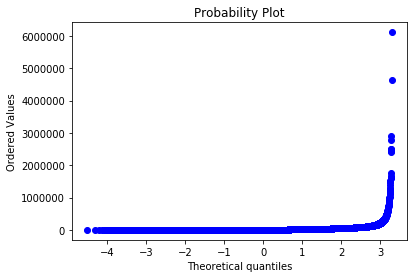

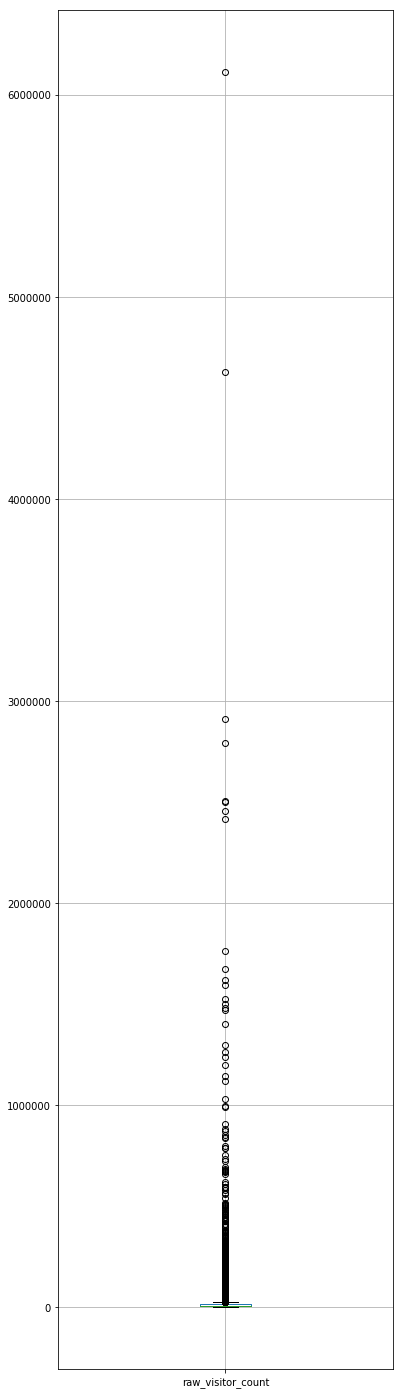

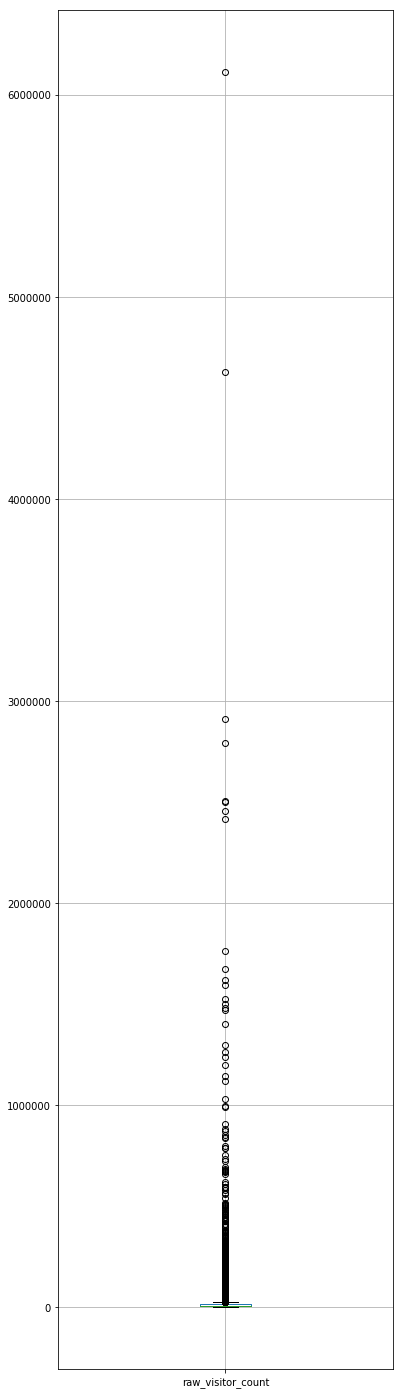

In [46]:
data2=pda.DataFrame(cbg,columns=['raw_visitor_count'])
mode2 = data2['raw_visitor_count'].mode()
print("众数:\n",mode2)
data22 = pda.DataFrame(cbg,columns=['raw_visitor_count'])
data22['raw_visitor_count'].fillna(mode2, inplace=True)

print(data22.describe())
print("The NULL value num:", data22.isnull().sum())
#绘制直方图
plt.xlim(0,120000)
data22['raw_visitor_count'].hist(bins=300)
data2['raw_visitor_count'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
#qq图绘制
stats.probplot(data22['raw_visitor_count'], dist="norm", plot=plt)
plt.show()
stats.probplot(data2['raw_visitor_count'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data22.boxplot(figsize=(6,25))
plt.show()
data2.boxplot(figsize=(6,25))
plt.show()

众数:
 0    8345.0
dtype: float64
       distance_from_home
count        2.205180e+05
mean         3.511280e+04
std          9.973193e+04
min          7.060000e+02
25%          8.584000e+03
50%          1.461400e+04
75%          3.139775e+04
max          6.297845e+06
The NULL value num: distance_from_home    217
dtype: int64


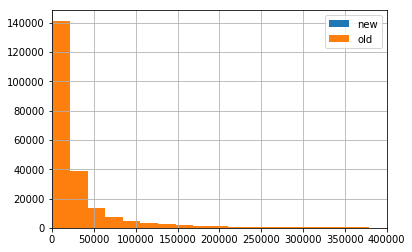

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


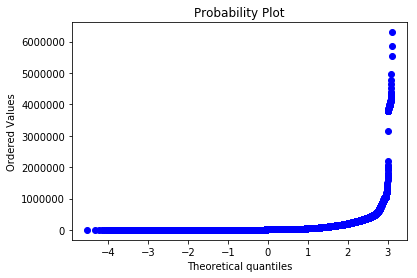

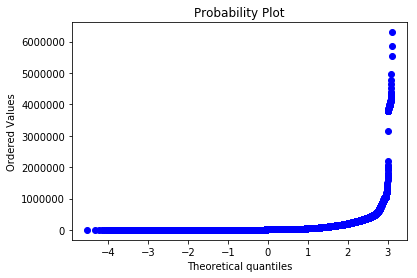

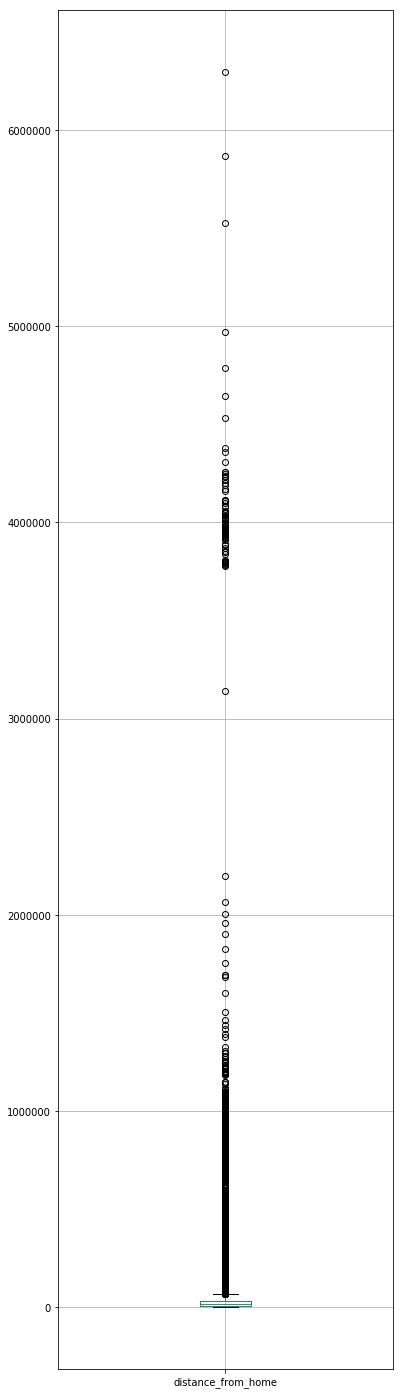

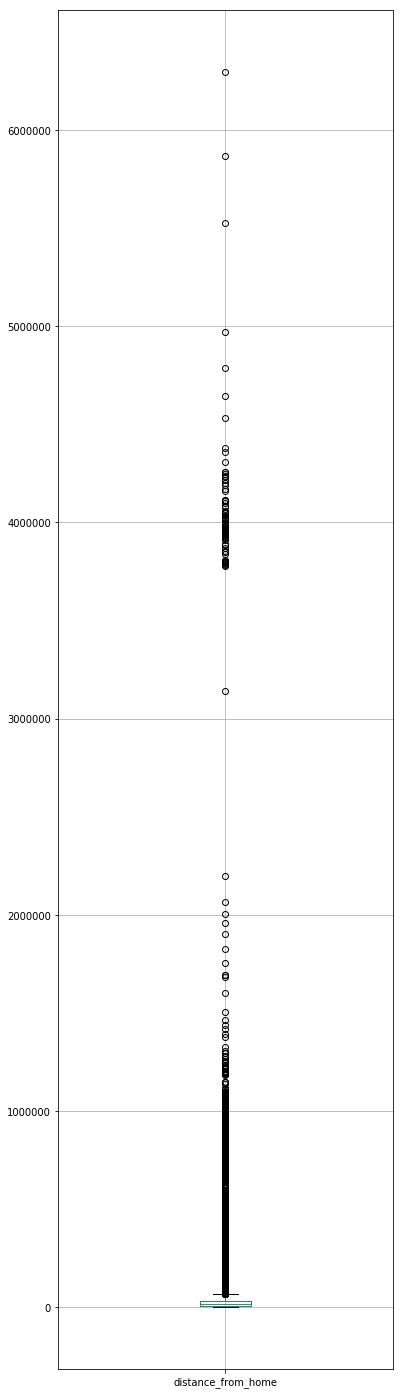

In [47]:
data3=pda.DataFrame(cbg,columns=['distance_from_home'])
mode3 = data3['distance_from_home'].mode()
print("众数:\n",mode3)
data33 = pda.DataFrame(cbg,columns=['distance_from_home'])
data33['distance_from_home'].fillna(mode3, inplace=True)

print(data33.describe())
print("The NULL value num:", data33.isnull().sum())
#绘制直方图
plt.xlim(0,400000)
data33['distance_from_home'].hist(bins=300)
data3['distance_from_home'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
#qq图绘制
stats.probplot(data33['distance_from_home'], dist="norm", plot=plt)
plt.show()
stats.probplot(data3['distance_from_home'], dist="norm", plot=plt)
plt.show()
#绘制盒图
data33.boxplot(figsize=(6,25))
plt.show()
data3.boxplot(figsize=(6,25))
plt.show()

（3）、通过属性的相关关系来填补缺失值

In [ ]:
linreg = LinearRegression()
data = cbg.dropna(subset=['distance_from_home'])
y = data[['distance_from_home']]
data2 = cbg[['distance_from_home','date_range_start']]
RFR = RandomForestRegressor(random_state=0, n_estimators=50, n_jobs=-1)
known_distance = data2[data2.distance_from_home.notnull()].as_matrix()
unknown_distance = data2[data2.distance_from_home.isnull()].as_matrix()
y = known_distance[:, :1]
X = known_distance[:, 1:]
RFR.fit(X,y)
predicteddistance = RFR.predict(unknown_distance[:, 1:])
datasets = cbg
datasets.loc[(datasets.distance_from_home.isnull()),'distance_from_home'] = predicteddistance

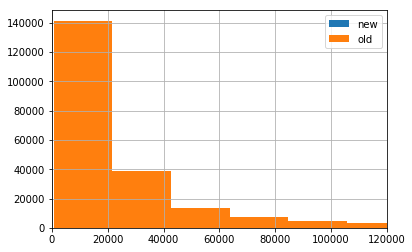

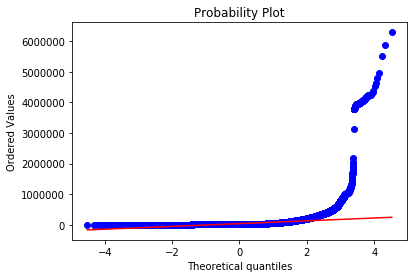

c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\double\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


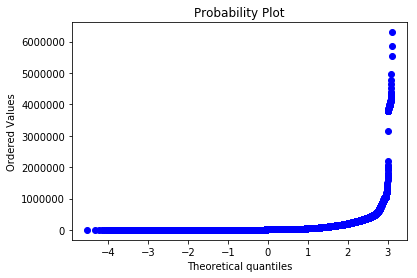

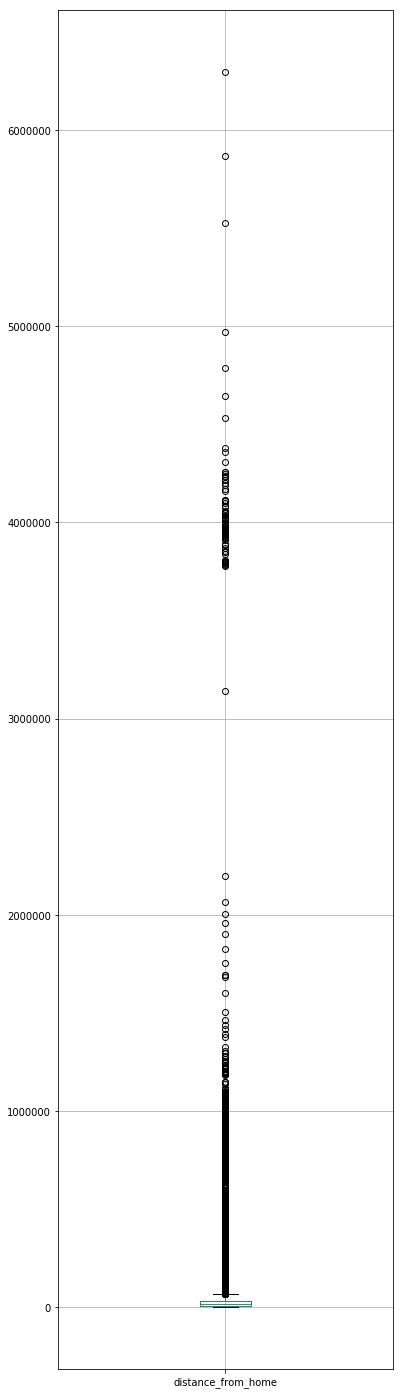

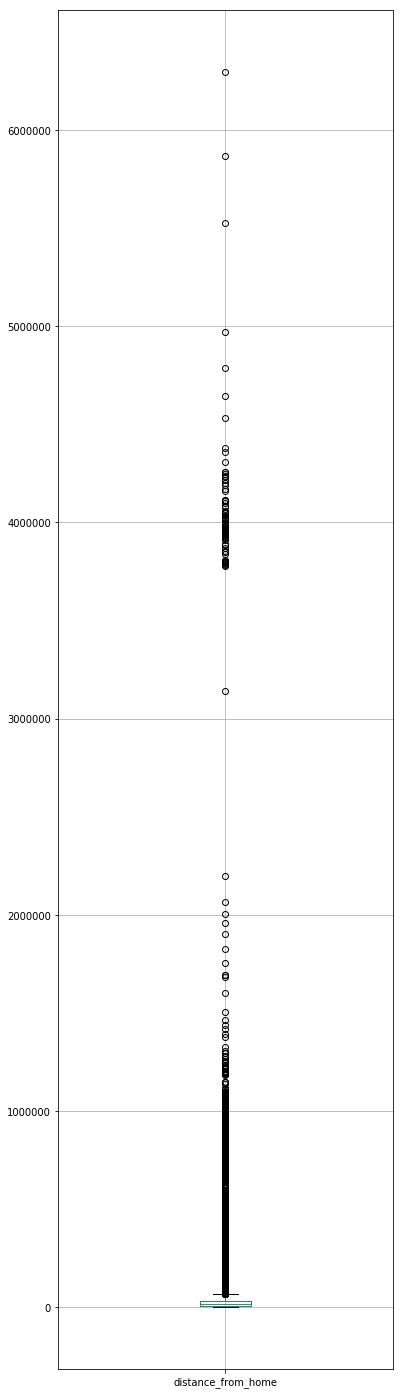

In [55]:
data333= pda.DataFrame(datasets,columns=['distance_from_home'])
plt.xlim(0,120000)
data333['distance_from_home'].hist(bins=300)
data3['distance_from_home'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
stats.probplot(data333['distance_from_home'], dist="norm", plot=plt)
plt.show()
stats.probplot(data3['distance_from_home'], dist="norm", plot=plt)
plt.show()
data333.boxplot(figsize=(6,25))
plt.show()
data3.boxplot(figsize=(6,25))
plt.show()

(4)、通过数据对象之间的相似性来填补缺失值

In [ ]:
cty = cbg[['distance_from_home','raw_visitor_count','raw_visit_count']]
ans1=cty.sort_values(["raw_visit_count","distance_from_home"],inplace=False,ascending=True)
ans2=ans1
while len(ans1)!=len(ans1.dropna()):
    ans1=ans1.fillna(method="bfill")
ans11= ans1['raw_visitor_count'].as_matrix()
while len(ans2)!=len(ans2.dropna()):
    ans2=ans2.fillna(method='ffill')
ans22= ans2['raw_visitor_count'].as_matrix()
ans3=(ans22+ans11)/2

In [ ]:
cty['raw_visitor_count']=pda.DataFrame(ans3)
d=pda.DataFrame(cty,columns=['raw_visitor_count'])
plt.xlim(0,200)
d['raw_visitor_count'].hist(bins=300)
data_price['raw_visitor_count'].hist(bins=300)
plt.legend(['new','old'])
plt.show()
stats.probplot(d['raw_visitor_count'], dist="norm", plot=plt)
plt.show()
stats.probplot(data_price['raw_visitor_count'], dist="norm", plot=plt)
plt.show()
d.boxplot(figsize=(6,25))
plt.show()
data_price.boxplot(figsize=(6,25))
plt.show()